In [81]:
# PCA -> Principal Component Analysis, boyut azaltma tekniği 

## Boyutsallık Laneti

Genellikle, gerçek dünya veri setleri binlerce hatta milyonlarca özellik içerir. Bu durum, model eğitiminin çok yavaşlamasına sebep olabilir çünkü yüksek boyutlu veri ile çalışmak oldukça zaman alıcıdır. Bu tür durumlarda, iyi bir çözüm bulmak zorlaşır. Bu sorun, "boyutsallık laneti" olarak adlandırılır.

Boyutsallık laneti, veriyi yüksek boyutlu uzaylarda analiz etmeye veya düzenlemeye çalışırken ortaya çıkan çeşitli zorlukları ifade eder. 

Boyutlar arttıkça, veri noktaları arasındaki mesafeler artar ve bu da verinin seyrekleşmesine neden olur. Seyrekleşen veri, istatistiksel anlamlılık elde etmeyi zorlaştırır.

Gerçek dünyada, genellikle veri setinin boyutunu önemli ölçüde azaltmak mümkündür. Bu işleme "boyut indirgeme" denir. Boyut indirgeme, çok sayıda özelliği birkaç temel bileşene indirerek, hem eğitim sürecini hızlandırır hem de veriyi görselleştirmeyi kolaylaştırır.

En yaygın boyut indirgeme tekniklerinden biri, "Temel Bileşenler Analizi" (PCA) olarak bilinir.

## Temel Bileşenler Analizi (PCA) 

Temel Bileşenler Analizi (PCA), büyük bir özellik kümesini, varyansın çoğunu koruyarak daha küçük bir küme haline getirmek için kullanılan bir boyut indirgeme tekniğidir.

- Varyansı Korumak

PCA, önce verilere en yakın olan bir düzlemi (hiper düzlem) bulur ve ardından veriyi bu düzleme projekte eder. Ancak projeksiyondan önce doğru düzlemi seçmek gerekir. Projeksiyon, maksimum varyansı koruyacak şekilde yapılır. PCA'nın temel amacı budur.

- Temel Bileşenler

PCA, veri setindeki en fazla varyansı açıklayan eksenleri (yani yönleri) belirler. Bu eksenlere "temel bileşenler" denir. PCA, veri setinin orijin etrafında merkezlendiğini varsayar. Scikit-Learn gibi kütüphanelerin PCA sınıfları, veriyi otomatik olarak merkezler.

- Boyut İndirgeme

Temel bileşenler belirlendikten sonra, veri seti bu bileşenler üzerine projekte edilerek boyutları azaltılır. Bu projeksiyon, veri setindeki mümkün olan en fazla bilgiyi (varyansı) korur.

## Boyutsallık Laneti ve PCA Nedir?

Boyutsallık laneti, veriyi çok yüksek boyutlu uzaylarda analiz ederken ortaya çıkan bir problemdir. Boyutlar arttıkça, veri noktaları arasındaki mesafeler artar ve veri seyreltik hale gelir. Bu durumda, anlamlı sonuçlar elde etmek zorlaşır çünkü veriler arasındaki ilişkiler daha az belirgin hale gelir.

Bu problemi çözmek için, genellikle boyut indirgeme adı verilen bir teknik kullanılır. 

Boyut indirgeme, veri setindeki özelliklerin sayısını azaltarak, daha az ama daha önemli bilgiyi saklamayı amaçlar. Bu, hem veriyi daha anlaşılır kılar hem de eğitim süreçlerini hızlandırır.

Temel Bileşenler Analizi (PCA), en yaygın boyut indirgeme yöntemlerinden biridir. 

PCA, veri setindeki en önemli varyansı açıklayan eksenleri belirler ve veri noktalarını bu eksenlere projekte eder. 

(NOT: "Projekte etmek" terimi, verileri veya noktaları daha düşük bir boyuta dönüştürmek anlamına gelir. Bu işlem, veriyi yüksek boyutlu bir uzaydan, daha az boyutlu bir uzaya "projeksiyon" yaparak taşımayı ifade eder.

Örneğin, bir veri kümesini üç boyutlu bir uzaydan iki boyutlu bir düzleme projekte etmek, verinin sadece iki boyutlu bir temsilini elde etmek anlamına gelir. Bu işlemin amacı, veri kümesinin boyutunu azaltarak daha basit ve anlaşılır bir formda sunmaktır, böylece verinin analizi daha kolay hale gelir.)

Böylece, veri seti daha az boyutta ama hala çok önemli bilgileri içeren bir hale gelir.



In [82]:
from datetime import time

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

In [83]:

df = pd.read_csv("bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [84]:
df.shape

(13393, 12)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [86]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [87]:
y = df["class"]
y

0        C
1        A
2        C
3        B
4        B
        ..
13388    C
13389    D
13390    A
13391    D
13392    C
Name: class, Length: 13393, dtype: object

In [88]:
# PCA ile kategorik değerler kullanılmaz. Bunun için FAMD-factorial analysis o mixed data kullanılır.

df_no_cat = df.drop(columns=["class","gender"])
df_no_cat

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0
...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0


In [89]:
df.drop(columns=["gender","class"], inplace=True)

In [90]:
def normalisation(df):
    scaler = StandardScaler()
    scaled_data_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return scaled_data_norm

In [91]:
norm_data = normalisation(df)
print(norm_data)

            age  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0     -0.717432   0.443873   0.652150   -0.267367   0.112009 -0.015959   
1     -0.864220  -0.422465  -0.974734   -1.039081  -0.167278 -0.287820   
2     -0.423857   1.310211   0.883127   -0.432734   1.229158  1.479276   
3     -0.350463   0.704961   0.305684   -0.667004  -0.260374  1.139450   
4     -0.644038   0.621888   0.021147   -0.846152  -0.818948 -0.219855   
...         ...        ...        ...         ...        ...       ...   
13388 -0.864220   0.420138   0.364265   -0.970178  -0.446565  0.731658   
13389 -1.157795   1.322079  -0.296866   -1.535183  -0.446565 -0.151890   
13390  0.163293   1.025388   1.092346   -0.432734  -0.074183  0.119971   
13391  1.998138  -2.665451  -0.815728    2.364730  -1.005140 -0.627647   
13392 -0.203676  -0.541142  -0.112753   -0.515418   0.298200  1.343345   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
0       1.688190                 0.3

Text(0, 0.5, 'Cumulative explained variance')

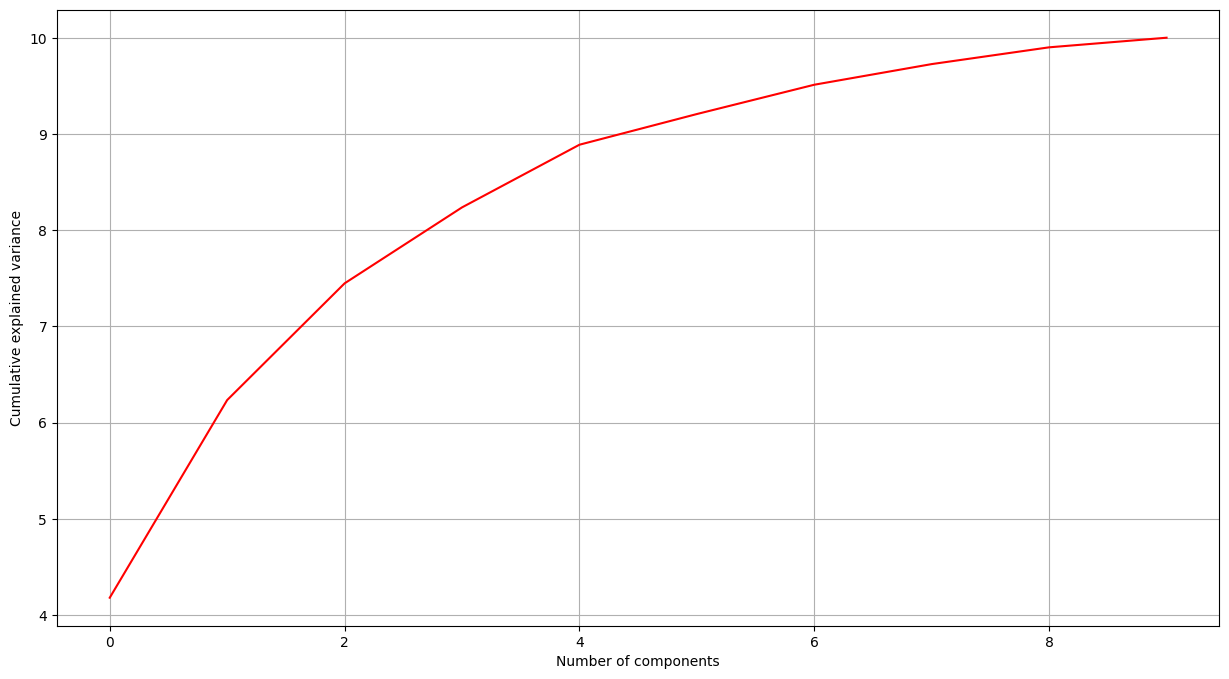

In [92]:
from sklearn.decomposition import PCA

components_num = 10 

pca = PCA(components_num)
reduced  = pca.fit_transform(norm_data)
#print(reduced)
variance = np.cumsum(pca.explained_variance_)
#print(variance)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(range(components_num), variance, color="r")
ax.grid(True) # en başta çıkan ([<matplotlib.lines.Line2D at 0x11a9cf290>])yazısını kaldırmak için 
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [93]:
pca = PCA()

principal_components = pca.fit_transform(norm_data)
#print(principal_components)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f}, Cumulative: {cumulative_explained_variance[i]:.4f}")
    
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(print(f"Number of components to retain {threshold*100}% variance: {num_components}"))

pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(norm_data)

# Create a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(num_components)]
pca_df = pd.DataFrame(data=principal_components, columns=columns)
pca_df.head()

Principal Component 1: 0.4181, Cumulative: 0.4181
Principal Component 2: 0.2054, Cumulative: 0.6235
Principal Component 3: 0.1213, Cumulative: 0.7448
Principal Component 4: 0.0789, Cumulative: 0.8237
Principal Component 5: 0.0651, Cumulative: 0.8888
Principal Component 6: 0.0319, Cumulative: 0.9207
Principal Component 7: 0.0305, Cumulative: 0.9512
Principal Component 8: 0.0214, Cumulative: 0.9726
Principal Component 9: 0.0174, Cumulative: 0.9900
Principal Component 10: 0.0100, Cumulative: 1.0000
Number of components to retain 95.0% variance: 7
None


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.198794,-0.464313,0.258100,-0.356276,0.526946,-0.390618,-0.644706
1,0.707768,-1.549424,0.749855,0.017978,-1.089495,-0.213766,-0.275912
2,1.903292,1.529722,0.329101,-0.532388,-0.342180,0.196487,0.612954
3,1.678080,0.014424,0.394239,0.049007,-0.238478,-0.717925,0.677519
4,1.200588,-1.438134,0.605761,0.295597,0.812657,0.167417,0.633746


In [94]:
def covariance_calculation(mean_sub):
    for col in mean_sub.columns:
        mean_sub[col] = mean_sub[col]-mean_sub[col].mean()
        
    return np.dot(mean_sub.T, mean_sub)/(len(mean_sub) - 1)

In [95]:
cov_cal = covariance_calculation(norm_data)

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(df_no_cat, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, y, test_size=0.3, random_state=42)

In [98]:
model = LogisticRegression(max_iter=10000)

In [99]:
# Original Data

start_time_original = time.time()
model.fit(x_train_original, y_train_original)
y_pred_original = model.predict(x_test_original)
accuracy_original = accuracy_score(y_test_original, y_pred_original)
end_time_original = time.time()
runtime_original = end_time_original - start_time_original

print(f"Accuracy on original data: {accuracy_original:.4f}")
print(classification_report(y_test_original, y_pred_original))
print(f"Runtime on original data: {runtime_original:.4f}")

Accuracy on original data: 0.6142
              precision    recall  f1-score   support

           A       0.69      0.70      0.69      1040
           B       0.44      0.43      0.43       966
           C       0.52      0.55      0.53       969
           D       0.80      0.76      0.78      1043

    accuracy                           0.61      4018
   macro avg       0.61      0.61      0.61      4018
weighted avg       0.62      0.61      0.61      4018

Runtime on original data: 2.7478


In [100]:
# PCA-transformed data

start_time_original = time.time()
model.fit(X_train_pca, y_train_pca)
y_pred_pca = model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
end_time_original = time.time()
runtime_original = end_time_original - start_time_original


print(f"Accuracy on PCA-transformed data: {accuracy_pca:.4f}")
print(classification_report(y_test_pca, y_pred_pca))
print(f"Runtime on PCA-transformed data: {runtime_original:.4f}")

Accuracy on PCA-transformed data: 0.5921
              precision    recall  f1-score   support

           A       0.67      0.67      0.67      1040
           B       0.42      0.41      0.42       966
           C       0.50      0.52      0.51       969
           D       0.77      0.75      0.76      1043

    accuracy                           0.59      4018
   macro avg       0.59      0.59      0.59      4018
weighted avg       0.59      0.59      0.59      4018

Runtime on PCA-transformed data: 0.0392
